# README

Before execute the code above, execute the steps of section "**Accessing Google Drive from Google Colab**". These steps will configure the execution environment in colab, with all requirements necessaries.

# Accessing Google Drive from Google Colab

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Move to the project directory



> **WARNING: For this step you will need to have downloaded the repository on your google drive. [How to do here](https://colab.research.google.com/drive/156ye97gzuYg4jFlL49495WQy9t-_oJnH?authuser=2#scrollTo=NNQ-wTalk-Fn).** 



In [2]:
%cd /content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
!pwd

/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification
/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/algoritmos/precoce-ms-classification


## Install requirements

### Install python 3.8

In [3]:
!sudo apt-get install python3.8 python3.8-dev python3.8-venv python3.8-minimal python3-pip graphviz python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpython3.8 libpython3.8-dev libpython3.8-minimal libpython3.8-stdlib
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pkg-resources python3-secretstorage python3-setuptools python3-six
  python3-wheel python3-xdg
Suggested packages:
  python-crypto-doc python-cryptography-doc python3-cryptography-vectors
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0
  python-secretstorage-doc python-setuptools-doc binfmt-support
The following NEW packages will be installed:
  libpython3.8 libp

### Chenge defaul version of [colab python](https://stackoverflow.com/questions/68657341/how-can-i-update-google-colabs-python-version)

In [4]:
!python --version
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2
!python --version

Python 3.7.14
update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in auto mode
Python 3.8.14


### Update pip and install setup tools

In [5]:
!python -m pip install -U pip
!python -m pip install -U setuptools

    100% |████████████████████████████████| 2.0MB 588kB/s 
  Found existing installation: pip 9.0.1
    Not uninstalling pip at /usr/lib/python3/dist-packages, outside environment /usr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 39.0.1
    Uninstalling setuptools-39.0.1:
      Successfully uninstalled setuptools-39.0.1


### Instaling requirements of project

In [6]:
!python -m pip install -U -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

### Update path for [packages of requirements](https://stackoverflow.com/questions/72452445/how-do-i-install-the-specific-version-of-python-3-8-2-in-colab)

In [7]:
#!ls -lah /usr/local/lib/python3.8/dist-packages/
# !ls -lah /usr/local/lib/python3.7/dist-packages/
%env PYTHONPATH=
import sys 
sys.path.append('/usr/local/lib/python3.8/dist-packages/')

env: PYTHONPATH=


In [8]:
!python --version

Python 3.8.14


# Library

In [9]:
# utilities
import csv_treatments
import pre_processing
import reports
import pattern_extraction
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 5000)


# Settings

In [10]:
# Path to the dataset
csv_path = '/content/drive/MyDrive/Mestrado-computacao-aplicada/documentos_dissertacao/base_dados/TAB_MODELAGEM_RAFAEL_2020_1.csv'

# Number of lines to be read from the dataset, where None read all lines
number_csv_lines = None

# Dictionay with type of data for each column
dtype_dict = {
    'ID_ANIMAL': 'uint32',
    'EstabelecimentoMunicipio': 'category',
    'Frigorifico_ID': 'uint8',
    'Frigorifico_CNPJ': 'uint64',
    'Frigorifico_RazaoSocial': 'category',
    'Municipio_Frigorifico': 'category',
    'Tipificacao': 'category',
    'Maturidade': 'category',
    'Acabamento': 'category',
    'Peso': 'float32',
    'EstabelecimentoIdentificador': 'uint16',
    'Questionario_ID': 'uint16',
    'QuestionarioClassificacaoEstabel': 'uint8',
    'FERTIIRRIGACAO': 'uint8',
    'ILP': 'uint8',
    'IFP': 'uint8',
    'ILPF': 'uint8',
    'CONCEN_VOLUM': 'UInt8',
    'CREEPFEEDING': 'UInt8',
    'FORN_ESTRAT_SILAGEM': 'UInt8',
    'PROTEICO': 'UInt8',
    'PROTEICO_ENERGETICO': 'UInt8',
    'RACAO_BAL_CONS_INFERIOR': 'UInt8',
    'SAL_MINERAL': 'UInt8',
    'SALMINERAL_UREIA': 'UInt8',
    'RACAOO_BAL_CONSUMO_IG': 'UInt8',
    'GRAO_INTEIRO': 'UInt8',
    'ALTO_CONCENTR_VOLUM': 'UInt8',
    'ALTO_CONCENTRADO': 'UInt8',
    'QuestionarioPossuiOutrosIncentiv': 'uint8',
    'QuestionarioFabricaRacao': 'uint8',
    'area so confinamento': 'UInt8',
    'regua de manejo': 'UInt8',
    'boa cobertura vegetal, com baixa': 'UInt8',
    'erosaoo laminar ou em sulco igua': 'UInt8',
    'identificacao individual': 'UInt8',
    'rastreamento SISBOV': 'UInt8',
    'Lista Trace': 'UInt8',
    'BPA': 'UInt8',
    'participa de aliancas mercadolog': 'UInt8',
    'QuestionarioPraticaRecuperacaoPa': 'uint8',
    'Confinamento': 'UInt8',
    'Suplementacao_a_campo': 'UInt8',
    'SemiConfinamento': 'UInt8',
    'dif_datas': 'uint16',
    'tot7d_Chuva': 'float32',
    'med7d_TempInst': 'float32',
    'med7d_TempMin': 'float32',
    'med7d_UmidInst': 'float32',
    'med7d_formITUinst': 'float32',
    'med7d_formITUmax': 'float32',
    'med7d_NDVI': 'float32',
    'med7d_EVI': 'float32',
    'med7d_preR_soja': 'float32',
    'med7d_preR_milho': 'float32',
    'med7d_preR_boi': 'float32',
    'tot1m_Chuva': 'float32',
    'med1m_TempInst': 'float32',
    'med1m_UmidInst': 'float32',
    'med1m_formITUinst': 'float32',
    'med1m_NDVI': 'float32',
    'med1m_EVI': 'float32',
    'med1m_preR_soja': 'float32',
    'med1m_preR_milho': 'float32',
    'med1m_preR_boi': 'float32',
    'tot3m_Chuva': 'float32',
    'med3m_TempInst': 'float32',
    'med3m_UmidInst': 'float32',
    'med3m_formITUinst': 'float32',
    'med3m_formITUmax': 'float32',
    'med3m_NDVI': 'float32',
    'med3m_EVI': 'float32',
    'med3m_preR_soja': 'float32',
    'med3m_preR_milho': 'float32',
    'med3m_preR_boi': 'float32',
    'tot6m_Chuva': 'float32',
    'med6m_TempInst': 'float32',
    'med6m_UmidInst': 'float32',
    'med6m_formITUinst': 'float32',
    'med6m_NDVI': 'float32',
    'med6m_EVI': 'float32',
    'med6m_preR_soja': 'float32',
    'med6m_preR_milho': 'float32',
    'med6m_preR_boi': 'float32',
    'tot12m_Chuva': 'float32',
    'med12m_TempInst': 'float32',
    'med12m_TempMin': 'float32',
    'med12m_UmidInst': 'float32',
    'med12m_formITUinst': 'float32',
    'med12m_NDVI': 'float32',
    'med12m_EVI': 'float32',
    'med12m_preR_soja': 'float32',
    'med12m_preR_milho': 'float32',
    'med12m_preR_boi': 'float32',
    'cnt7d_CL_ITUinst': 'float32',
    'cnt1m_CL_ITUinst': 'float32',
    'cnt3m_CL_ITUinst': 'float32',
    'cnt6m_CL_ITUinst': 'float32',
    'cnt12m_CL_ITUinst': 'float32',
    'ANO': 'uint16',
    'CATEGORIA': 'category',
    'classificacao': 'category',
    'Motivo': 'category'
}

# List with dates to parse
parse_dates = [
    'DataAbate', 'Data_homol', 'DataAbate_6m_ANT',
    'data_homol_select', 'data12m', 'data6m',
    'data3m', 'data1m', 'data7d'
]

# List with columns to delete when loading dataset
# delete_columns_names_on_load_data = None
delete_columns_names_on_load_data = [
    'Frigorifico_ID', 'Frigorifico_CNPJ', 'Frigorifico_RazaoSocial', 'Municipio_Frigorifico',
    'EstabelecimentoIdentificador', 'Data_homol', 'Questionario_ID',
    'area so confinamento', 'Lista Trace', 'Motivo', 'data_homol_select', 'dif_datas',
    'DataAbate_6m_ANT', 'data12m', 'data6m', 'data3m', 'data1m', 'data7d',
    'tot7d_Chuva', 'med7d_TempInst', 'med7d_TempMin', 'med7d_UmidInst', 'med7d_formITUmax', 'med7d_NDVI', 'med7d_EVI',
    'tot1m_Chuva', 'med1m_TempInst', 'med1m_UmidInst', 'med1m_NDVI', 'med1m_EVI',
    'tot3m_Chuva', 'med3m_TempInst', 'med3m_UmidInst', 'med3m_formITUmax', 'med3m_NDVI', 'med3m_EVI',
    'tot6m_Chuva', 'med6m_TempInst', 'med6m_UmidInst', 'med6m_NDVI', 'med6m_EVI',
    'tot12m_Chuva', 'med12m_TempInst', 'med12m_TempMin', 'med12m_UmidInst', 'med12m_NDVI', 'med12m_EVI',
]


# CSV Treatments

## Dataset

In [11]:
# Load the dataset
precoce_ms_data_frame = csv_treatments.load_data(
    csv_path=csv_path, delete_columns_names=delete_columns_names_on_load_data,
    number_csv_lines=number_csv_lines, dtype_dict=dtype_dict, parse_dates=parse_dates
)


*****INICIO LOAD DATA******

*****INICIO PRINT INFOS******
Número total de linhas do DataFrame: 3153593
Número de colunas: 112
Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153593 entries, 0 to 3153592
Data columns (total 112 columns):
 #    Column                            Dtype         
---   ------                            -----         
 0    ID_ANIMAL                         uint32        
 1    EstabelecimentoMunicipio          category      
 2    DataAbate                         datetime64[ns]
 3    Frigorifico_ID                    uint8         
 4    Frigorifico_CNPJ                  uint64        
 5    Frigorifico_RazaoSocial           category      
 6    Municipio_Frigorifico             category      
 7    Tipificacao                       category      
 8    Maturidade                        category      
 9    Acabamento                        category      
 10   Peso                              float32       
 11   Estabelecim

# Reports

## All attributes

In [ ]:
# Print a report of all attributes
reports.all_attributes(data_frame=precoce_ms_data_frame)


A saída de streaming foi truncada nas últimas 5000 linhas.
146.279999      164
141.809998      160
151.929993      153
135.839996      149
146.910004      130
149.339996      128
140.589996      123
146.860001      118
144.380005      117
146.339996      106
149.550003      100
146.119995       90
153.649994       85
144.210007       81
145.259995       80
152.449997       72
146.660004       70
145.669998       68
151.009995       66
144.039993       66
137.839996       64
147.699997       40
147.470001       40
147.919998       30
142.649994       30
146.529999       28
135.850006       22
147.229996       20
150.089996       10
Name: med6m_preR_boi, dtype: int64
-------------------------------
Nome da coluna: med12m_formITUinst
72.309998    14677
71.459999    13196
72.480003    13130
73.089996    12876
71.519997    12343
71.910004    12308
72.129997    12228
70.800003    12190
72.400002    11874
71.790001    11660
71.970001    11646
70.730003    11636
71.750000    11450
72.169998   

## Delete duplicate rows by attribute, and print the report

In [12]:
# Delete the duplicated rows by attribute, and print the report
precoce_ms_data_frame = pre_processing.delete_duplicate_rows_by_attribute(
    data_frame=precoce_ms_data_frame, attribute_name='ID_ANIMAL', print_report=True)

precoce_ms_data_frame = pre_processing.delete_columns(
    data_frame=precoce_ms_data_frame, columns_names=['ID_ANIMAL'])



*****INICIO DELETE DUPLICATE ROWS BY ATTRIBUTE******
Linhas duplicadas encontradas para o atributo ID_ANIMAL.

*****INICIO RELATÓRIO LINHAS DUPLICADAS******
Data Frame do Atríbuto ID_ANIMAL com as linhas duplicadas:



,ID_ANIMAL,EstabelecimentoMunicipio,DataAbate,Tipificacao,Maturidade,Acabamento,Peso,QuestionarioClassificacaoEstabel,FERTIIRRIGACAO,ILP,...,med12m_preR_milho,med12m_preR_boi,cnt7d_CL_ITUinst,cnt1m_CL_ITUinst,cnt3m_CL_ITUinst,cnt6m_CL_ITUinst,cnt12m_CL_ITUinst,ANO,CATEGORIA,classificacao
2361947,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361946,3326125,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,365.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361949,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361957,3326126,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,336.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361945,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361955,3326127,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Gordura Escassa - 1 A 3 Mm De Espessura,313.399994,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361956,3326128,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Magra - Gordura Ausente,335.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361959,3326128,BANDEIRANTES,2020-05-18,Macho Inteiro,4,Magra - Gordura Ausente,335.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,D,NÃO
2361950,3326129,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,353.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM
2361943,3326129,BANDEIRANTES,2020-05-18,Macho Inteiro,2,Gordura Escassa - 1 A 3 Mm De Espessura,353.000000,26,0,1,...,44.849998,179.279999,0.000000,0.000000,0.000000,0.021900,0.010900,2020,BB,SIM


Relatório dos atributos que divergem, entre os registros que tem o atributo ID_ANIMAL igual.
ID_ANIMAL:3326125
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361946    1
2361947    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326126
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361949    1
2361957    0
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326127
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361945    0
2361955    1
Name: identificacao individual, dtype: UInt8
-------------------------------
Próximo ++++++++++++++
ID_ANIMAL:3326128
Nome coluna que diverge: identificacao individual
Index das linhas e valor na coluna que diverge:
2361956    0
2361959    1
Name: identificacao individual, dtype: 

## NaN attributes

In [13]:
# Delete NaN rows
precoce_ms_data_frame = pre_processing.delete_nan_rows(
    data_frame=precoce_ms_data_frame, print_report=True)

reports.informations(data_frame=precoce_ms_data_frame)



*****INICIO DELETE NAN ROWS******
Linhas com valores NaN encontradas.

*****INICIO RELATÓRIO ATRIBUTOS NAN******
Total de Ocorrencia de NaN no DataFrame: 1243483
Linhas com valores NaN:         EstabelecimentoMunicipio  DataAbate     Tipificacao Maturidade  \
2046                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2047                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2048                 SIDROLANDIA 2017-03-22  Macho Castrado          d   
2049                 SIDROLANDIA 2017-03-22   Macho Inteiro          2   
2050                 SIDROLANDIA 2017-03-22  Macho Castrado          2   
...                          ...        ...             ...        ...   
3153193                   TACURU 2020-12-31  Macho Castrado          2   
3153194                   TACURU 2020-12-31  Macho Castrado          2   
3153195                   TACURU 2020-12-31  Macho Castrado          d   
3153196                   TACURU 2020-12-31  Macho Castrado          2   

## Unique values

In [14]:
# Print the unique values for each column
reports.unique_values_for_each_column(
    data_frame=precoce_ms_data_frame
)


*****INICIO IMPRIMIR UNIQUE VALUES FOR EACH COLUMN******
EstabelecimentoMunicipio              75
DataAbate                           1116
Tipificacao                            3
Maturidade                             5
Acabamento                             5
Peso                                3777
QuestionarioClassificacaoEstabel       4
FERTIIRRIGACAO                         2
ILP                                    2
IFP                                    2
ILPF                                   2
CONCEN_VOLUM                           2
CREEPFEEDING                           2
FORN_ESTRAT_SILAGEM                    2
PROTEICO                               2
PROTEICO_ENERGETICO                    2
RACAO_BAL_CONS_INFERIOR                2
SAL_MINERAL                            2
SALMINERAL_UREIA                       2
RACAOO_BAL_CONSUMO_IG                  2
GRAO_INTEIRO                           2
ALTO_CONCENTR_VOLUM                    2
ALTO_CONCENTRADO                       2

In [ ]:
precoce_ms_data_frame['classificacao'].value_counts()

SIM    2126831
NÃO     416230
Name: classificacao, dtype: int64

In [ ]:
for column in precoce_ms_data_frame.columns:
  try:
    print('Coluna: {} Variancia: {}'.format(column, precoce_ms_data_frame[column].var()))
  except:
    pass

Coluna: Peso Variancia: 2281.347412109375
Coluna: QuestionarioClassificacaoEstabel Variancia: 12.946052487378761
Coluna: FERTIIRRIGACAO Variancia: 0.10573559312948166
Coluna: ILP Variancia: 0.24880338434832885
Coluna: IFP Variancia: 0.047298579335953224
Coluna: ILPF Variancia: 0.044062929816520595
Coluna: CONCEN_VOLUM Variancia: 0.1612079400541439
Coluna: CREEPFEEDING Variancia: 0.07672995767413188
Coluna: FORN_ESTRAT_SILAGEM Variancia: 0.07372127177574284
Coluna: PROTEICO Variancia: 0.2471633409504197
Coluna: PROTEICO_ENERGETICO Variancia: 0.23749502498807268
Coluna: RACAO_BAL_CONS_INFERIOR Variancia: 0.1621871420678325
Coluna: SAL_MINERAL Variancia: 0.24575562148869354
Coluna: SALMINERAL_UREIA Variancia: 0.12863501294027577
Coluna: RACAOO_BAL_CONSUMO_IG Variancia: 0.24976344225656
Coluna: GRAO_INTEIRO Variancia: 0.06201280277637232
Coluna: ALTO_CONCENTR_VOLUM Variancia: 0.20185113694023707
Coluna: ALTO_CONCENTRADO Variancia: 0.011757463396811633
Coluna: QuestionarioPossuiOutrosIncent

## Percentage of unique values

In [15]:
# Print the percentage of unique values for each column
reports.percentage_unique_values_for_each_column(
    data_frame=precoce_ms_data_frame, threshold=1
)


*****INICIO IMPRIMIR PERCENTAGE UNIQUE VALUES FOR EACH COLUMN******
Column: EstabelecimentoMunicipio - 75 - 0.00%
Column: DataAbate - 1116 - 0.04%
Column: Tipificacao - 3 - 0.00%
Column: Maturidade - 5 - 0.00%
Column: Acabamento - 5 - 0.00%
Column: Peso - 3777 - 0.15%
Column: QuestionarioClassificacaoEstabel - 4 - 0.00%
Column: FERTIIRRIGACAO - 2 - 0.00%
Column: ILP - 2 - 0.00%
Column: IFP - 2 - 0.00%
Column: ILPF - 2 - 0.00%
Column: CONCEN_VOLUM - 2 - 0.00%
Column: CREEPFEEDING - 2 - 0.00%
Column: FORN_ESTRAT_SILAGEM - 2 - 0.00%
Column: PROTEICO - 2 - 0.00%
Column: PROTEICO_ENERGETICO - 2 - 0.00%
Column: RACAO_BAL_CONS_INFERIOR - 2 - 0.00%
Column: SAL_MINERAL - 2 - 0.00%
Column: SALMINERAL_UREIA - 2 - 0.00%
Column: RACAOO_BAL_CONSUMO_IG - 2 - 0.00%
Column: GRAO_INTEIRO - 2 - 0.00%
Column: ALTO_CONCENTR_VOLUM - 2 - 0.00%
Column: ALTO_CONCENTRADO - 2 - 0.00%
Column: QuestionarioPossuiOutrosIncentiv - 2 - 0.00%
Column: QuestionarioFabricaRacao - 2 - 0.00%
Column: regua de manejo - 1 - 0

## Attributes that have a low variance


*****INICIO IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******
Shape do X antes: (2543061, 63).
X shape (Dados originais): (2543061, 63)
Após separar os atributos numéricos.
X shape (Dados não numéricos): (2543061, 34)
X_aux shape (Dados numéricos): (2543061, 29)

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 29
>>> Threshold: 0.00
Número de colunas depois da remoção: 28
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 28
>>> Threshold: 0.05
Número de colunas depois da remoção: 23
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 23
>>> Threshold: 0.10
Número de colunas depois da remoção: 22
*****FIM DELETE COLUMNS WITH LOW VARIANCE*********

*****INICIO DELETE COLUMNS WITH LOW VARIANCE******
>>> Número de colunas antes da remoção: 22
>>> Threshold: 0

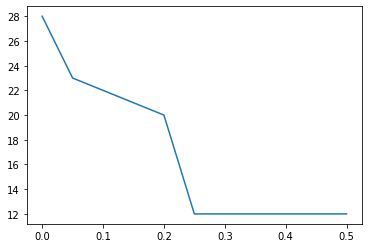


*****FIM IMPRIMIR SIMULATE DELETE COLUMNS WITH LOW VARIANCE******


In [ ]:
# Simulate delete columns with low variance
reports.simulate_delete_columns_with_low_variance(
    data_frame=precoce_ms_data_frame, thresholds=np.arange(0.0, 0.55, 0.05), separate_numeric_columns=True)
